In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
from sklearn.datasets import load_boston #getboston dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
boston_data = load_boston()
print(boston_data.keys()) #lets see the data

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [31]:
boston_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston['MEDV'] = boston_data.target

In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(array([ 9., 12., 18., 37., 40., 42., 83., 71., 72., 12., 23., 18., 16.,
        14.,  7.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <a list of 20 Patch objects>)

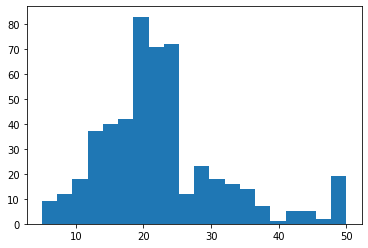

In [15]:
plt.hist(boston['MEDV'],bins=20)

In [18]:
corr_matrix = boston.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


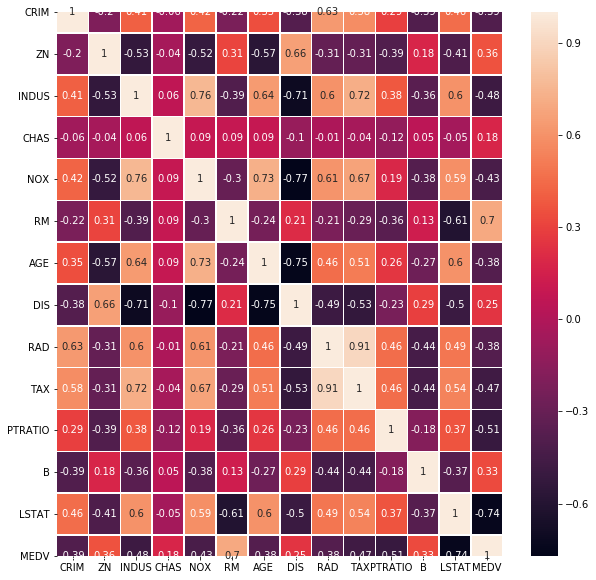

In [26]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=corr_matrix,annot=True,ax=ax,linewidth=0.5)

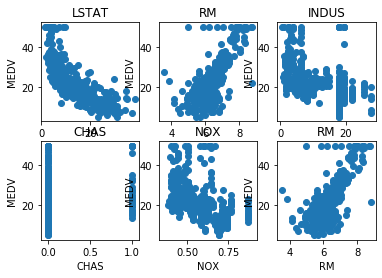

In [49]:
#If we select both the featues which are highly corelated then it is difficult to predict 
#the change that varible has on the output
features = ['LSTAT','RM','INDUS','CHAS','NOX','RM']
target = boston['MEDV']

for i,col in enumerate(features):
    plt.subplot(2,len(features)/2,i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [51]:
x=pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
y=boston['MEDV']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)

(404, 2)


In [52]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#training
y_train_pre = lin_model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_pre))
print(rmse)

5.6371293350711955


In [58]:
r2 = r2_score(y_train,y_train_pre)

In [59]:
print(r2)

0.6300745149331701


In [63]:
#testing
y_test_pre = lin_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pre))
r2_test = r2_score(y_test,y_test_pre)
print(rmse_test)
print(r2_test)

5.13740078470291
0.6628996975186954
